In [5]:
!pip install tensorflow matplotlib

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8767 - loss: 0.4099 - val_accuracy: 0.9640 - val_loss: 0.1164
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9724 - loss: 0.0915 - val_accuracy: 0.9682 - val_loss: 0.0963
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9828 - loss: 0.0545 - val_accuracy: 0.9739 - val_loss: 0.0860
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9854 - loss: 0.0430 - val_accuracy: 0.9732 - val_loss: 0.0950
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9743 - val_loss: 0.1013
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9771 - val_loss: 0.0911
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9739 - val_loss: 0.1032
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9937 - loss: 0.0200 - 

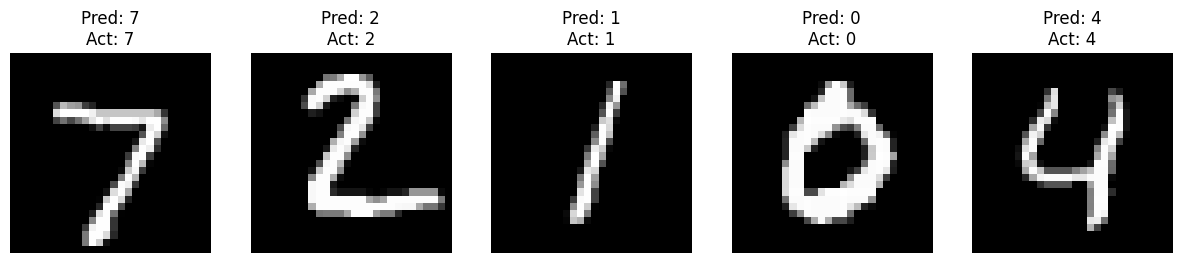

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define and compile the ANN model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
def predict_and_display(indices):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for idx, i in enumerate(indices):
        image = x_test[i].reshape(28, 28)
        actual_label = np.argmax(y_test[i])
        processed_image = image.reshape(1, 28 * 28)
        prediction = model.predict(processed_image)
        predicted_digit = np.argmax(prediction)

        # Display the image
        axes[idx].imshow(image, cmap='gray')
        axes[idx].set_title(f"Pred: {predicted_digit}\nAct: {actual_label}")
        axes[idx].axis('off')

    plt.show()

# Test the prediction function with multiple images
indices_to_test = [0, 1, 2, 3, 4]
predict_and_display(indices_to_test)
